In [2]:
import scipy.io
import os
import os.path as op
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

In [3]:
p = '/Volumes/GoogleDrive/.shortcut-targets-by-id/1GP7DKWJranQy6jycoCLbBHoyU1gq8cLp/2_TeamWork_VisualNeglect/1_Dataset'

In [4]:
Dataset_folder = sorted([ f.path for f in os.scandir(p) if '.mat' in f.name ])

In [54]:
Dataset_folder

['/Volumes/GoogleDrive/.shortcut-targets-by-id/1GP7DKWJranQy6jycoCLbBHoyU1gq8cLp/2_TeamWork_VisualNeglect/1_Dataset/Trajectory10_Healthy.mat',
 '/Volumes/GoogleDrive/.shortcut-targets-by-id/1GP7DKWJranQy6jycoCLbBHoyU1gq8cLp/2_TeamWork_VisualNeglect/1_Dataset/Trajectory11_Healthy.mat',
 '/Volumes/GoogleDrive/.shortcut-targets-by-id/1GP7DKWJranQy6jycoCLbBHoyU1gq8cLp/2_TeamWork_VisualNeglect/1_Dataset/Trajectory11_Patient.mat',
 '/Volumes/GoogleDrive/.shortcut-targets-by-id/1GP7DKWJranQy6jycoCLbBHoyU1gq8cLp/2_TeamWork_VisualNeglect/1_Dataset/Trajectory13_Patient.mat',
 '/Volumes/GoogleDrive/.shortcut-targets-by-id/1GP7DKWJranQy6jycoCLbBHoyU1gq8cLp/2_TeamWork_VisualNeglect/1_Dataset/Trajectory19_Patient.mat',
 '/Volumes/GoogleDrive/.shortcut-targets-by-id/1GP7DKWJranQy6jycoCLbBHoyU1gq8cLp/2_TeamWork_VisualNeglect/1_Dataset/Trajectory22_Patient.mat',
 '/Volumes/GoogleDrive/.shortcut-targets-by-id/1GP7DKWJranQy6jycoCLbBHoyU1gq8cLp/2_TeamWork_VisualNeglect/1_Dataset/Trajectory23_Patient.mat',

In [5]:
RT_Present = True
MaxExpLength = 3000

In [96]:
m = scipy.io.loadmat('/Volumes/GoogleDrive/.shortcut-targets-by-id/1GP7DKWJranQy6jycoCLbBHoyU1gq8cLp/2_TeamWork_VisualNeglect/1_Dataset/Trajectory10_Healthy.mat')

In [102]:
a =  [elem[0]  for elem in  m['RTs'].tolist()]

In [101]:
a

[[1386],
 [0],
 [1995],
 [1011],
 [880],
 [1239],
 [1369],
 [1177],
 [886],
 [911],
 [0],
 [1410],
 [1284],
 [894],
 [670],
 [2654],
 [1006],
 [1055],
 [1133],
 [815],
 [1270],
 [1078],
 [987],
 [1173],
 [1706],
 [1304],
 [1184],
 [1354],
 [1242],
 [1513],
 [1078],
 [974],
 [962],
 [1333],
 [1168],
 [1218],
 [1606],
 [1704],
 [0],
 [1117],
 [866],
 [931],
 [1198],
 [1316],
 [838],
 [0],
 [1013],
 [1119],
 [1314],
 [1138],
 [1130],
 [691],
 [970],
 [1565],
 [1195],
 [0],
 [748],
 [1390],
 [1251],
 [969],
 [1294],
 [2032],
 [1306],
 [861],
 [1356],
 [1325],
 [1919],
 [0],
 [1088],
 [1292],
 [925],
 [1721],
 [0],
 [885],
 [1193],
 [911],
 [1412],
 [911],
 [0],
 [976],
 [1411],
 [0],
 [0],
 [1031],
 [1428],
 [1117],
 [775],
 [1281],
 [879],
 [1530],
 [1683],
 [800],
 [758],
 [740],
 [775],
 [743],
 [659],
 [578],
 [822],
 [1304],
 [1945],
 [676],
 [682],
 [0],
 [1277],
 [819],
 [964],
 [731],
 [609],
 [681],
 [676],
 [0],
 [798],
 [1610],
 [1295],
 [910],
 [730],
 [1376],
 [681],
 [1052],


In [6]:
# Read the dataset
Dataset = []
for subject in Dataset_folder:
    #read the .mat file
    m = scipy.io.loadmat(subject)
    singlesubj_trials = []

    #fill the data structure with trial information
    for i in range (0, len(m['EyeX_'])):

        cX = m['EyeX_'][i]
        cY = m['EyeY_'][i]

        trial_df = pd.DataFrame()
        xs = pd.DataFrame(cX).transpose().rename({0 : 'X'}, axis = 'index').transpose()['X'].ffill().bfill()
        ys = pd.DataFrame(cY).transpose().rename({0 : 'Y'}, axis = 'index').transpose()['Y'].ffill().bfill()
        trial_df  = xs.append(ys).transpose()

        #dimensions
        trial_dict = {
            'EyeX' : m['EyeX_'][i],
            'EyeY' : m['EyeY_'][i],
            #'Target' : m['Targ_Location']
        }

        #response times
        if RT_Present:
            trial_dict['RT']  = list[m['RTs']]

        #lamba m['Label'][0,0] == x : trial_dict['label']

        #label, 1 = healthy, -1 = neglect
        if m['Label'][0,0] == 1:
            trial_dict['label'] = [1] * len(m['EyeX_'][i])
        elif m['Label'][0,0] == -1:
            trial_dict['label'] = [-1] * len(m['EyeX_'][i])

        singlesubj_trials.append(trial_dict)
    Dataset.append(singlesubj_trials)

In [93]:
trial_df = pd.DataFrame()
xs = pd.DataFrame(Dataset[0][0]['EyeX']).transpose().rename({0 : 'X'}, axis = 'index').transpose()['X'].ffill().bfill()
ys = pd.DataFrame(Dataset[0][0]['EyeY']).transpose().rename({0 : 'Y'}, axis = 'index').transpose()['Y'].ffill().bfill()
trial_df  = xs.append(ys).transpose()
#trial_df['isX.NaN'] = trial_df[['X']].isnull().apply(lambda x: all(x), axis=1)
#trial_df['isY.NaN'] = trial_df[['Y']].isnull().apply(lambda x: all(x), axis=1)
# imputer = KNNImputer(n_neighbors=2)
# imputer.fit(tmpx)


#trial_df[trial_df['isX.NaN']  ==  'True']['X'] =

# trial_df['NeedsInterpolation'] = trial_df[['X','Y']].isnull().apply(lambda x: all(x), axis=1)

# trial_df['difference'] = trial_df['isX.NaN'].astype(int) - trial_df['isY.NaN'].astype(int)

In [95]:
trial_df

0       501.0
1       501.0
2       501.0
3       501.0
4       501.0
        ...  
2705      0.0
2706      0.0
2707      0.0
2708      0.0
2709      0.0
Length: 5420, dtype: float64

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

In [89]:
out = tmpx['X'].ffill().bfill()

In [90]:
out.head(50)

0     501.0
1     501.0
2     501.0
3     501.0
4     501.0
5     501.0
6     501.0
7     501.0
8     501.0
9     501.0
10    501.0
11    501.0
12    502.0
13    504.0
14    503.0
15    501.0
16    502.0
17    502.0
18    503.0
19    503.0
20    500.0
21    503.0
22    500.0
23    501.0
24    503.0
25    501.0
26    502.0
27    501.0
28    501.0
29    502.0
30    502.0
31    500.0
32    500.0
33    503.0
34    501.0
35    502.0
36    501.0
37    502.0
38    501.0
39    499.0
40    501.0
41    502.0
42    500.0
43    501.0
44    502.0
45    501.0
46    501.0
47    501.0
48    501.0
49    501.0
Name: X, dtype: float64

<AxesSubplot:ylabel='X'>

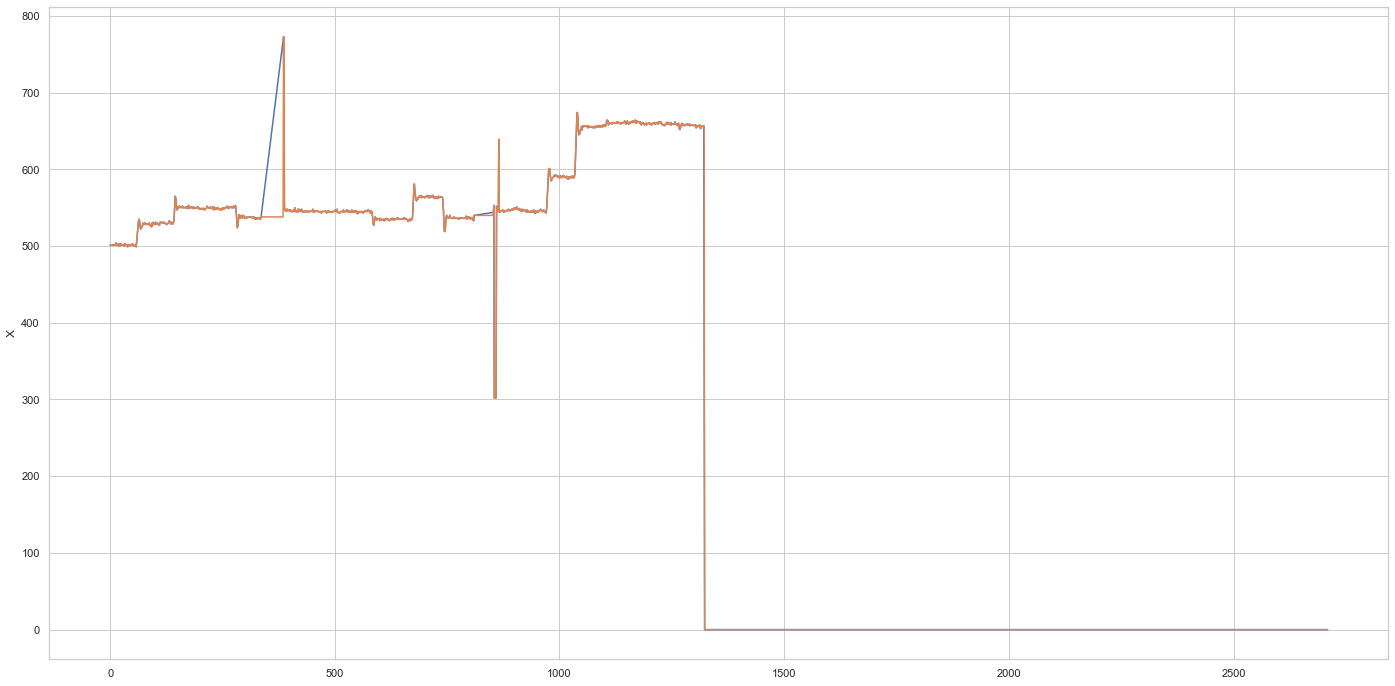

In [91]:
f, ax = plt.subplots(figsize=(24, 12))

sns.set_theme(style='whitegrid')

sns.lineplot(x = tmpx.index, y  = tmpx['X'], data = tmpx)
sns.lineplot(x = tmpx.index, y = out)
